In [1]:
!python --version

Python 3.7.3


In [2]:
# !pip install -q -U pip
# !pip install -q numpy
# !pip install -q pandas
# !pip install -q ckiptagger
# !pip install -q tqdm
# !pip install -q tensorflow==1.14.0
# !pip install -q ipywidgets
# !pip install -q matplotlib

In [2]:
import pandas as pd
import numpy as np

from ckiptagger import WS, POS
from tqdm.notebook import tqdm

In [5]:
df_train = pd.read_csv('news_clustering_train.tsv', sep='\t')
df_test = pd.read_csv('news_clustering_test.tsv', sep='\t')
print(df_train.head(5))
print(df_test.head(5))

   index class                      title
0      0    體育   亞洲杯奪冠賠率：日本、伊朗領銜 中國竟與泰國並列
1      1    體育  9輪4球本土射手僅次武磊 黃紫昌要搶最強U23頭銜
2      2    體育       如果今年勇士奪冠，下賽季詹姆斯何去何從？
3      3    體育      超級替補！科斯塔本賽季替補出場貢獻7次助攻
4      4    體育    騎士6天里發生了啥？從首輪搶七到次輪3-0猛龍
   index class                                title
0   1800    體育                   如果騎士火箭進入總決賽，誰的勝算大？
1   1801    體育             從個人競技狀態來看，三個階段的詹姆斯，哪個最強？
2   1802    體育       騎士總冠軍！地球人誰能阻擋詹姆斯？史上最佳就是他！打服所有人
3   1803    體育                   詹姆斯絕殺，騎士3比0，猛龍懷疑人生
4   1804    體育  騎士和步行者戰成搶七險勝，而猛龍即將被橫掃，步行者跟猛龍的區別在哪裡？


In [4]:
train_titles = {row['index']: row['title'] for _, row in df_train.iterrows()}
train_classes = {row['index']: row['class'] for _, row in df_train.iterrows()}

test_titles = {row['index']: row['title'] for _, row in df_test.iterrows()}
test_classes = {row['index']: row['class'] for _, row in df_test.iterrows()}
print(test_titles)

{1800: '如果騎士火箭進入總決賽，誰的勝算大？', 1801: '從個人競技狀態來看，三個階段的詹姆斯，哪個最強？', 1802: '騎士總冠軍！地球人誰能阻擋詹姆斯？史上最佳就是他！打服所有人', 1803: '詹姆斯絕殺，騎士3比0，猛龍懷疑人生', 1804: '騎士和步行者戰成搶七險勝，而猛龍即將被橫掃，步行者跟猛龍的區別在哪裡？', 1805: '騎士G3詹姆斯8秒絕殺猛龍，為什麼網友都心疼起了德羅贊和洛瑞？', 1806: '回顧科比經典：幼科單挑基德2.3秒絕殺！科比霸氣動作慶祝', 1807: '西班牙國家德比大名單最新出爐，無欲無求之下，皇馬巴薩決定死磕，對此你怎麼看？', 1808: '女乒姑娘奪冠後接受採訪，盛贊日本姑娘在比賽中的發揮。這是怎麼回事？', 1809: '「熱點新聞」+24！塔圖姆的正負值再次追平隊史季後賽新秀單場', 1810: '6日體育精選：「人事觀察」奧運冠軍吳敏霞當選上海團市委副書記，這個崗位有多位體育明星', 1811: '科比他的一生之敵只有一個人，不是詹姆斯，那會是誰？', 1812: '為什麼明明詹姆斯最後體力不支，但是投那個絕殺球的時候，還能跳那麼高？', 1813: '世乒賽半決賽,小胖樊振東開啓無敵模式，3:1暴擊卡爾松。你怎麼看？', 1814: '張玉寧再一次被排除出大名單，不萊梅保級了也不要他 今夏離隊吧', 1815: '小克里琴科都不是富里的對手，英國狂人卻揚言將其KO出局', 1816: '喬丹、科比、詹姆斯，誰才是季後賽的關鍵先生？', 1817: '格林和隆多在場上矛盾不斷，為何雙方教練卻反過來稱贊對方？', 1818: '詹姆斯再一次絕殺了，猛龍輸球，你怎麼看？', 1819: '如果利物浦在歐冠決賽中戰勝皇馬，薩拉赫就能擊敗梅西C羅穩拿金球獎了嗎？', 1820: '5月6號，多倫多猛龍客場挑戰克利夫蘭騎士進行G3，猛龍可以獲得勝利避免被騎士橫掃嗎？', 1821: '這鍋太陽來背，球員在球場內發邊線球沒被發現', 1822: '圖解｜2017年恆大俱樂部虧損近10億，中超球隊普遍超支', 1823: '足球彩票：弗格森爵士突發腦溢血入院', 1824: '山東魯能客場0-0戰平北京人和，失去登頂機會，怎麼評價本場比賽？', 1825: '還是李曉霞會說話：啥也不說了東京拿下，今天

In [6]:
all_news_class = ['體育', '財經', '科技', '旅遊', '農業', '遊戲']

# 斷詞 + POS

In [7]:
ws = WS('./data/')
pos = POS('./data/')

In [8]:
train_title_cuts = {}
for index, title in tqdm(train_titles.items()):
    word_s = ws([title])
    word_p = pos(word_s)
    train_title_cuts[index] = list(zip(word_s[0], word_p[0]))

  0%|          | 0/1800 [00:00<?, ?it/s]

In [10]:
train_title_cuts[0]

[('亞洲杯', 'Nb'),
 ('奪', 'VC'),
 ('冠賠率', 'Na'),
 ('：', 'COLONCATEGORY'),
 ('日本', 'Nc'),
 ('、', 'PAUSECATEGORY'),
 ('伊朗', 'Nc'),
 ('領銜', 'VB'),
 (' ', 'WHITESPACE'),
 ('中國', 'Nc'),
 ('竟', 'D'),
 ('與', 'P'),
 ('泰國', 'Nc'),
 ('並列', 'VG')]

In [9]:
test_title_cuts = {}
for index, title in tqdm(test_titles.items()):
    word_s = ws([title])
    word_p = pos(word_s)
    test_title_cuts[index] = list(zip(word_s[0], word_p[0]))

  0%|          | 0/600 [00:00<?, ?it/s]

# Bag of Words (BOW)

In [12]:
word2index = {}
index2word = {}
n = 0
for index in train_title_cuts:
    for word, flag in train_title_cuts[index]:
        if word in word2index:
            continue
        word2index[word] = n 
        index2word[n] = word
        n += 1

In [13]:
def get_bow_vector_with_selection(pairs, word2index):
    excluded_flags = [
        'Nh', 'Nep', 'Nes', 'DE', 'T', 'P', 'V_2', 'SHI',
        'Dfa', 'Dfb', 'Da', 'Di', 'Dk',
        'Caa', 'Cab', 'Cba', 'Cbb',
        'COLONCATEGORY', 'COMMACATEGORY', 'DASHCATEGORY', 'DOTCATEGORY', 'ETCCATEGORY', 'EXCLAMATIONCATEGORY',
        'PARENTHESISCATEGORY', 'PAUSECATEGORY', 'PERIODCATEGORY', 'QUESTIONCATEGORY', 'SEMICOLONCATEGORY',
        'SPCHANGECATEGORY', 'WHITESPACE'
    ]
    vector = np.zeros(len(word2index))
    for word, flag in pairs:
        if word in word2index and flag not in excluded_flags:
            vector[word2index[word]] += 1
    return vector

In [14]:
train_bow_vectors = {
    index: get_bow_vector_with_selection(pairs, word2index)
    for index, pairs in train_title_cuts.items()
}

test_bow_vectors = {
    index: get_bow_vector_with_selection(pairs, word2index)
    for index, pairs in test_title_cuts.items()
}

In [46]:
print(len(train_bow_vectors))
print(len(test_bow_vectors))
print(train_bow_vectors[0])
print(len(train_bow_vectors[0]))
print(test_bow_vectors[1800])
print(len(test_bow_vectors[1800]))

1800
600
[1. 1. 1. ... 0. 0. 0.]
6690
[0. 0. 0. ... 0. 0. 0.]
6690


# TFIDF

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
train_index_array, train_vector_array = list(zip(*train_bow_vectors.items()))

# 使用`TfidfTransformer`來將`train_vector_array`轉換成`train_tfidf_vector_array`
# YOUR CODE HERE
transformer = TfidfTransformer()
transformer.fit(train_vector_array)
print(transformer.idf_)
print(len(transformer.idf_))

train_tfidf_vector_array = transformer.transform(train_vector_array)

# END YOUR CODE

[6.0111907  7.10980298 7.80295016 ... 7.80295016 7.80295016 7.80295016]
6690


In [17]:
train_tfidf_vector_array

<1800x6690 sparse matrix of type '<class 'numpy.float64'>'
	with 17126 stored elements in Compressed Sparse Row format>

In [18]:
type(train_tfidf_vector_array)

scipy.sparse.csr.csr_matrix

In [19]:
train_tfidf_vectors = {}
for i, index in enumerate(train_index_array):
    vector = train_tfidf_vector_array.getrow(i).toarray()[0]
    train_tfidf_vectors[index] = vector

In [25]:
train_index_array[0]

0

In [18]:
train_tfidf_vectors[120]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
test_index_array, test_vector_array = list(zip(*test_bow_vectors.items()))

# 使用同一個`TfidfTransformer`來轉換testing dataset
# YOUR CODE HERE
test_tfidf_vector_array = transformer.transform(test_vector_array)

# END YOUR CODE

In [33]:
test_tfidf_vector_array

<600x6690 sparse matrix of type '<class 'numpy.float64'>'
	with 4262 stored elements in Compressed Sparse Row format>

In [21]:
test_tfidf_vectors = {}
for i, index in enumerate(test_index_array):
    vector = test_tfidf_vector_array.getrow(i).toarray()
    test_tfidf_vectors[index] = vector

In [31]:
test_index_array

(1800,
 1801,
 1802,
 1803,
 1804,
 1805,
 1806,
 1807,
 1808,
 1809,
 1810,
 1811,
 1812,
 1813,
 1814,
 1815,
 1816,
 1817,
 1818,
 1819,
 1820,
 1821,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1830,
 1831,
 1832,
 1833,
 1834,
 1835,
 1836,
 1837,
 1838,
 1839,
 1840,
 1841,
 1842,
 1843,
 1844,
 1845,
 1846,
 1847,
 1848,
 1849,
 1850,
 1851,
 1852,
 1853,
 1854,
 1855,
 1856,
 1857,
 1858,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1868,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1876,
 1877,
 1878,
 1879,
 1880,
 1881,
 1882,
 1883,
 1884,
 1885,
 1886,
 1887,
 1888,
 1889,
 1890,
 1891,
 1892,
 1893,
 1894,
 1895,
 1896,
 1897,
 1898,
 1899,
 1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,

In [24]:
test_tfidf_vectors[1800]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [43]:
test_tfidf_vectors[1800].shape

(1, 6690)

# TFIDF + Group mean vector: 測試

In [26]:
group_vectors = {news_class: [] for news_class in all_news_class}
for index, vector in sorted(train_tfidf_vectors.items()):
    news_class = train_classes[index]
    group_vectors[news_class].append(vector)

group_mean_vector = {}
for news_class, vectors in group_vectors.items():
    group_mean_vector[news_class] = np.mean(vectors, axis=0)
group_mean_vector

{'體育': array([0.01151249, 0.00394476, 0.00120532, ..., 0.        , 0.        ,
        0.        ]),
 '財經': array([0., 0., 0., ..., 0., 0., 0.]),
 '科技': array([0., 0., 0., ..., 0., 0., 0.]),
 '旅遊': array([0., 0., 0., ..., 0., 0., 0.]),
 '農業': array([0., 0., 0., ..., 0., 0., 0.]),
 '遊戲': array([0.        , 0.        , 0.        , ..., 0.00171764, 0.00152024,
        0.00152024])}

In [27]:
def cosine_similarity(bow1, bow2):
    len_bow1 = np.sqrt(np.sum(np.square(bow1)))
    len_bow2 = np.sqrt(np.sum(np.square(bow2)))
    return np.sum(bow1 * bow2) / (len_bow1 * len_bow2)

In [28]:
classification = {news_class: [] for news_class in all_news_class}
for index, vector in sorted(test_tfidf_vectors.items()):
    if np.sum(np.square(vector)) == 0:
        continue

    max_val = -2.0
    max_class = None
    for news_class, ref_vector in group_mean_vector.items():
        val = cosine_similarity(ref_vector, vector)
        if val > max_val:
            max_class = news_class
            max_val = val

    classification[max_class].append(index)

In [29]:
from collections import Counter

for group, ids in classification.items():
    counter = Counter([test_classes[id] for id in ids])
    print('predict', group, ': ', counter)

predict 體育 :  Counter({'體育': 83, '遊戲': 7, '財經': 6, '旅遊': 6, '農業': 4, '科技': 2})
predict 財經 :  Counter({'財經': 75, '科技': 15, '旅遊': 7, '農業': 6, '體育': 4, '遊戲': 2})
predict 科技 :  Counter({'科技': 67, '財經': 11, '農業': 6, '體育': 3, '遊戲': 3, '旅遊': 2})
predict 旅遊 :  Counter({'旅遊': 78, '農業': 9, '科技': 4, '財經': 3, '遊戲': 1})
predict 農業 :  Counter({'農業': 74, '科技': 7, '旅遊': 5, '體育': 4, '財經': 3, '遊戲': 1})
predict 遊戲 :  Counter({'遊戲': 86, '體育': 4, '科技': 4, '財經': 2})


# Visualization

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')

anchor_classes, anchor_vectors = list(zip(*group_mean_vector.items()))
print(f"anchor_classes: {anchor_classes}")
anchor_vectors = np.array(anchor_vectors)  #.transpose()
print(f"anchor_vectors: {anchor_vectors}")
print(f"anchor_vectors.shape: {anchor_vectors.shape}")

test_tfidf_array = test_tfidf_vector_array.toarray()
print(f"test_tfidf_array: {test_tfidf_array}")
print(f"test_tfidf_array.shape: {test_tfidf_array.shape}")

# 為了看清楚Group Mean Vector怎麼幫助我們做分類問題，我們針對Group Mean Vector (anchor) 來進行PCA降維
# YOUR CODE HERE
pca.fit(anchor_vectors)
reduced_anchor_vectors = pca.transform(anchor_vectors)
reduced_test_tfidf_vector_array = pca.transform(test_tfidf_array)
# END YOUR CODE

anchor_classes: ('體育', '財經', '科技', '旅遊', '農業', '遊戲')
anchor_vectors: [[0.01151249 0.00394476 0.00120532 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00171764 0.00152024 0.00152024]]
anchor_vectors.shape: (6, 6690)
test_tfidf_array: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
test_tfidf_array.shape: (600, 6690)


In [52]:
reduced_anchor_vectors

array([[-0.02149987, -0.01955512],
       [-0.01250651,  0.03454422],
       [ 0.01532441,  0.06634181],
       [-0.04399492, -0.05766664],
       [-0.02597584,  0.01259888],
       [ 0.08865273, -0.03626315]])

In [49]:
reduced_test_tfidf_vector_array

array([[-0.0237776 , -0.03045768],
       [ 0.03089514, -0.08325018],
       [-0.02799609, -0.04679851],
       ...,
       [ 0.0402831 , -0.04660735],
       [ 0.09522959, -0.04196424],
       [ 0.03325491, -0.03344588]])

In [54]:
print(f"test_classes.get: {test_classes.get}")
print(f"test_index_array: {test_index_array}")
test_class_array = np.vectorize(test_classes.get)(test_index_array)
print(test_class_array)
print(len(test_class_array))

test_classes.get: <built-in method get of dict object at 0x135170ee8>
test_index_array: (1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,

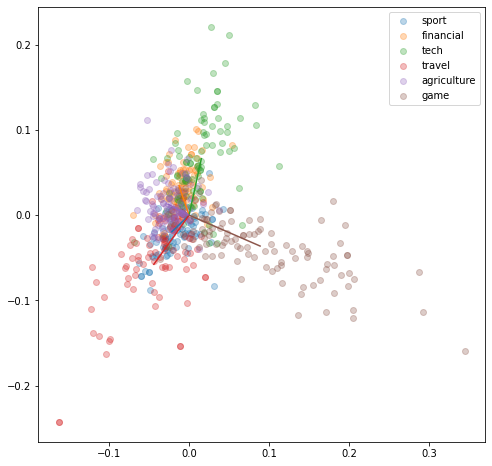

In [53]:
import matplotlib
import matplotlib.pyplot as plt

test_class_array = np.vectorize(test_classes.get)(test_index_array)

label_mapping = {
    '體育': 'sport',
    '財經': 'financial',
    '科技': 'tech',
    '旅遊': 'travel',
    '農業': 'agriculture',
    '遊戲': 'game'
}

plt.figure(figsize=(8, 8))
for real_class in all_news_class:
    plt.scatter(reduced_test_tfidf_vector_array[test_class_array == real_class, 0],
                reduced_test_tfidf_vector_array[test_class_array == real_class, 1],
                label=label_mapping[real_class],
                alpha=0.3)
    i = anchor_classes.index(real_class)
    plt.plot([0, reduced_anchor_vectors[i, 0]], [0, reduced_anchor_vectors[i, 1]])
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()